# CMB basics
This notebook shows functions related to blackbody (and similar) intensities and their derivatives.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import jr_util as jr  # a library of blackbody-related functions
%matplotlib inline

c= 2.99792458e8
h = 6.626068e-34
k = 1.3806503e-23

## Blackbody Brightness
Let's start by defining the photon frequency range over which we want to calculate things and make our plots.  We will do everything in SI units unless otherwise stated.  We'll also concentrate on the example of the CMB blackbody, but it's instructive to play with that temperature.

In [4]:
Tcmb = 2.725

nu_ghz = np.arange(10.,500,1.)    # every GHz for now.
nu = nu_ghz*1.e9
lam = c/nu


Now, calculate the blackbody brightness (for 2 polarizations), and plot it on linear and log scales. 
<br>
$ B_\nu = \frac{2 h \nu^3}{c^2} \frac{1}{e^x - 1} $
<br>
where $x = h\nu/kT$.

In [5]:
x = (h*nu)/(k*Tcmb)
Bcmb =  2.*(h*nu)*(nu/c)**2 * (1./(np.exp(x) - 1.))

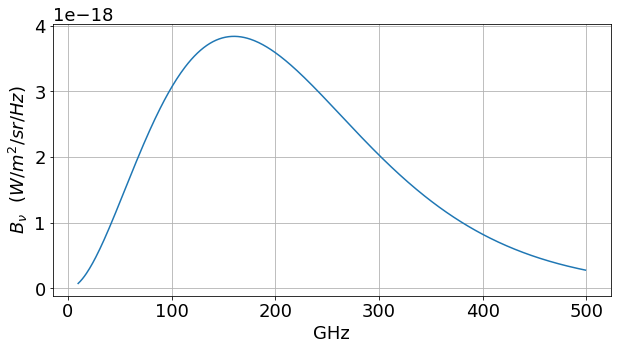

In [6]:
#plt.rc('xtick', labelsize=16)     
#plt.rc('ytick', labelsize=16)
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(nu_ghz,Bcmb)
plt.xlabel('GHz')
plt.ylabel(r'$B_{\nu} \ \ (W/m^2/sr/Hz)$')
plt.grid()

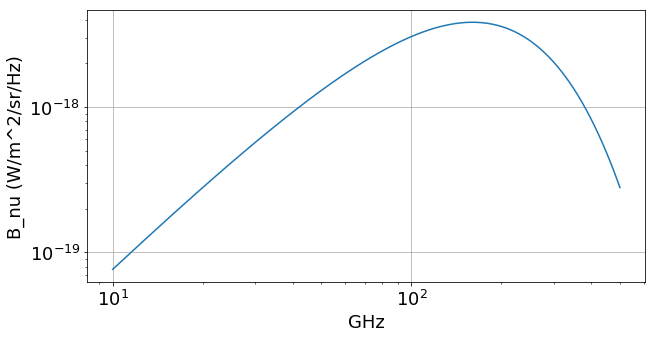

In [7]:
plt.loglog(nu_ghz,Bcmb)
plt.xlabel('GHz')
plt.ylabel('B_nu (W/m^2/sr/Hz)')
plt.grid()

From these we've learned that the CMB brightness peaks a little above 150GHz. To get the power on one of our single-moded, single-polarization detectors, we would integrate B_nu over
$A\Omega = \lambda^2$
, then integrate over frequency.  Because of this it's interesting to plot $P_\nu \equiv A\Omega B_{\nu}$, which gives you power/Hz.  (Below I multiply by $10^9$ to get Watts/GHz).

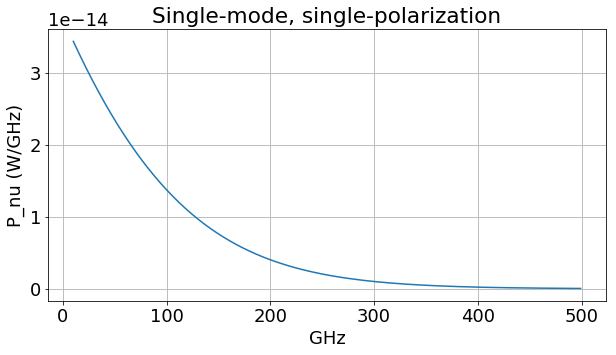

In [8]:
Pnu = 0.5*Bcmb*lam**2
plt.plot(nu_ghz,1e9*Pnu)
plt.title('Single-mode, single-polarization')
plt.xlabel('GHz')
plt.ylabel('P_nu (W/GHz)')
plt.grid()

This has the surprising result that the power/GHz decreases monotonically as the frequency increases!   However, our detectors' bandwidth is usually about as wide as we can manage to make it, which is typically about 20-30% of the center frequency.  Thus a 100GHz detector might have 25GHz of bandwidth, while a 150GHz detector might have 37GHz of bandwidth.  We can take this into account by now multiplying P_nu by $0.25\nu$, and see what that gives us. (I'll also multiply by 1e12 to get us to pW).

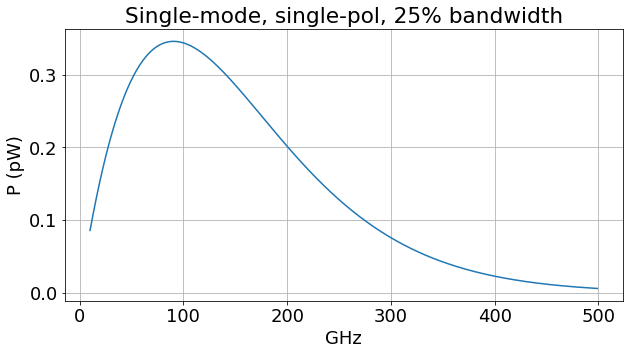

In [9]:
P25 = Pnu*(0.25*nu)
plt.plot(nu_ghz,1e12*P25)
plt.title('Single-mode, single-pol, 25% bandwidth')
plt.xlabel('GHz')
plt.ylabel('P (pW)')
plt.grid()

This tells us that the CMB power on such a detector peaks at around 100GHz, at a value of around 0.35pW! 
<br>
<br>
Sometimes, when you're looking at frequencies below the peak of a blackbody distribution, you can use the Rayleigh-Jeans formula for the blackbody brightness,
<br>
$B_{\nu} = \frac{2 k T}{\lambda^2}$
<br>
Let's plot that on top of the original Planck formula, then look at the power per GHz again.



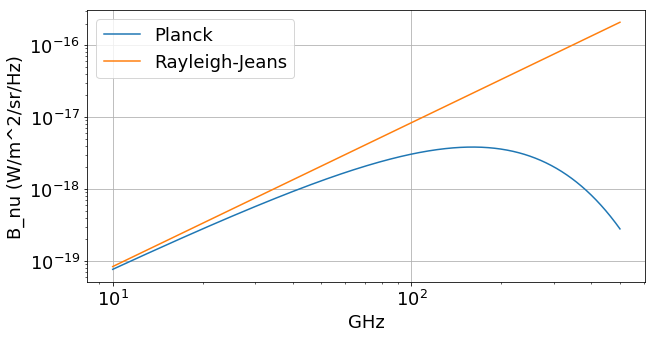

In [10]:
k=1.38e-23
Brj = (2*k*Tcmb/lam**2)
plt.loglog(nu_ghz,Bcmb,label='Planck')
plt.loglog(nu_ghz,Brj,label='Rayleigh-Jeans')
plt.xlabel('GHz')
plt.ylabel('B_nu (W/m^2/sr/Hz)')
plt.legend()
plt.grid()

You can see from this that the RJ formula always give a higher brightness than the Planck one, but that it approaches the right value at low frequency.  Another way to look at this is that there is a "Rayleigh-Jeans temperature" that gives the same brightness as the Planck formula does for 2.7K.   We can solve for that, and plot the T_RJ of the CMB as a function of frequency. 

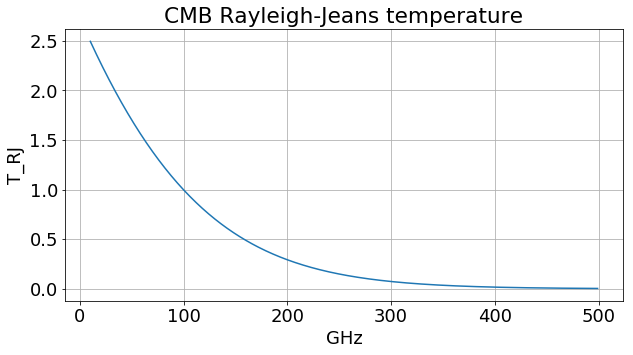

In [11]:
T_rj_cmb = Bcmb*lam**2/(2*k)
plt.plot(nu_ghz,T_rj_cmb)
plt.xlabel('GHz')
plt.ylabel('T_RJ')
plt.title('CMB Rayleigh-Jeans temperature')
plt.grid()

### <font color='blue'> Exercise:  Try playing with the temperature in these plots! </font>

 <font color='blue'>   You may have to re-define the frequency interval as well, depending on what want to see. 
</font>

## Brightness derivative
Our detectors sense the power difference when we look at a dim spot vs a bright spot on the CMB sky.  The CMB power is different in two directions because its temperature is slightly different.  Thus, the power differences we see are 
<br>
$ \Delta P \propto \left( \frac{dB}{dT} \right) \Delta T_{cmb}$,
<br>
where the derivative is evaluated at T=2.7K.  We can take that derivative analytically and plot it up.  For two polarizations,
<br>
$ B_\nu = \frac{2 h \nu^3}{c^2} \frac{1}{e^x - 1} $
<br>
so the derivative with respect to T is
<br>
$\frac{dB}{dT} =  \frac{2 h \nu^3}{c^2} \frac{e^x}{(e^x - 1)^2} \frac{h \nu}{k} \frac{1}{T^2}$
<br>
$\frac{dB}{dT} =  \frac{2 h^2 \nu^4}{kc^2 T^2}\frac{e^x}{(e^x - 1)^2}$
<br>


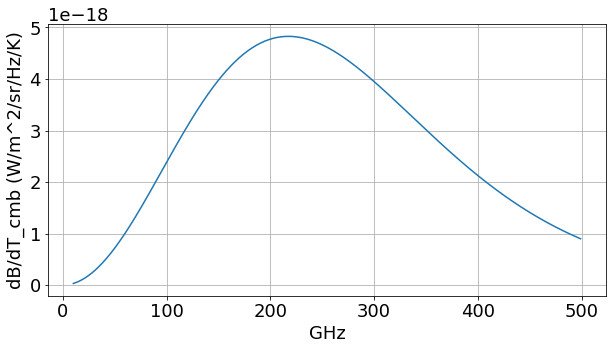

In [12]:
x = (h*nu)/(k*Tcmb)
# Factor of 2 on RHS means this is for 2 polarizations
prefac = 2*h**2/(k*c**2)
expx = np.exp(x)
dBdT = prefac*(nu**4/Tcmb**2)*(expx/(expx - 1)**2)
plt.plot(nu_ghz,dBdT)
plt.xlabel('GHz')
plt.ylabel('dB/dT_cmb (W/m^2/sr/Hz/K)')
plt.title('')
plt.grid()

Let's once again integrate this over $A\Omega$ for a single-mode, single-polarization detector, to get dP_nu/dT, in Watts/GHz/K.

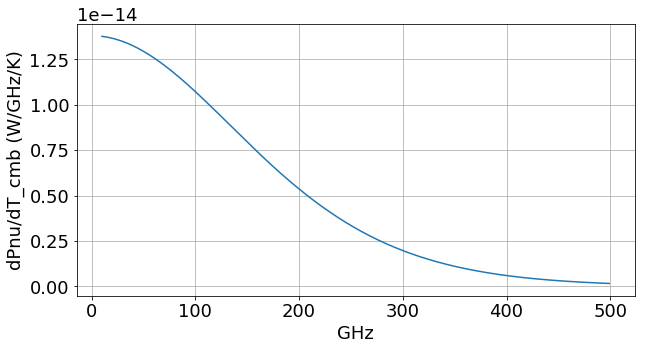

In [13]:
dPnudT = dBdT*lam**2
plt.plot(nu_ghz,0.5*1e9*dPnudT)
plt.xlabel('GHz')
plt.ylabel('dPnu/dT_cmb (W/GHz/K)')
plt.title('')
plt.grid()

This is what one would integrate over a frequency band to get the "Watts/K_cmb" for a given detector.  So, let's do that, assuming a 25% fractional bandwidth.  (Note that we're also not bothering to actually integrate over that band, we're just going to assume our band is "flat enough" to just multiply a value by the bandwidth... this is not quite right, but it's close.)  Note also that I'm going to convert to pW/K.

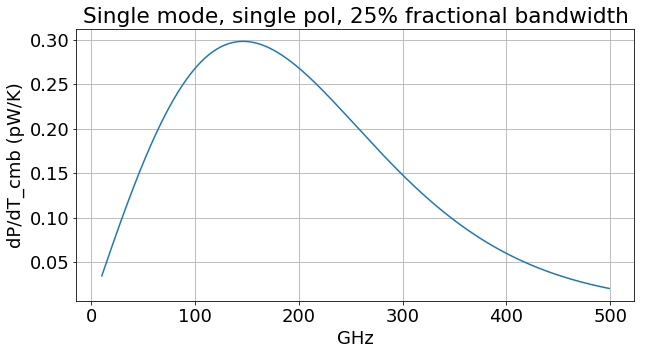

In [14]:
dPdT = dPnudT*0.25*nu
plt.plot(nu_ghz,0.5*dPdT*1e12)
plt.xlabel('GHz')
plt.ylabel('dP/dT_cmb (pW/K)')
plt.title('Single mode, single pol, 25% fractional bandwidth')
plt.grid()

This plot tells us that for 100uK rms temperature anisotropies, for example, we are expecting power differences smaller than femtowatts ($10^{-15}$W).   
<br>
Note also that this derivative, which has units of Watts/K , allows us to convert power variations in a measured skymap to "temperature variations of the 2.7K CMB", which is a unit we call "CMB Kelvin", or "K_cmb".  (This unit can be used even if the source of the power variations is galactic dust, say, rather than CMB.)

## $\Delta$T_cmb to $\Delta$T_RJ
We often want to convert back and forth between units of changes in "CMB temperature" and "Rayleigh Jeans temperature".  We do that using the ratio

$(\frac{dB}{dT_{cmb}} ) ~ / ~ (\frac{dB}{dT_{RJ}})$

Text(0, 0.5, 'dT_rj/dT_cmb')

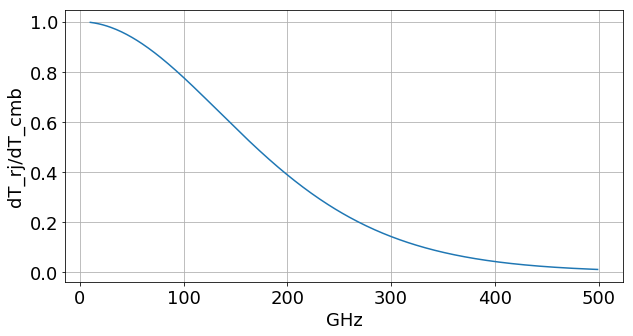

In [19]:
dBdTrj = 2*k/lam**2
dTrjdTcmb = dBdT/dBdTrj
plt.plot(nu_ghz,dTrjdTcmb)
plt.grid()
plt.xlabel('GHz')
plt.ylabel('dT_rj/dT_cmb')

## Graybodies
The CMB is a great blackbody, but many of the other things we deal with are not.  Emissive elements in our optics, like lenses or filters or mirrors, are one class of examples.  The atmosphere is another.  Galactic dust is a yet another.  These are all reasonably well described as "graybodies" - objects that emit with a blackbody spectrum, modified by a frequency-dependent emissivity factor.  Their emission is then
<br>
$I_{\nu} = \epsilon (\nu) B_{\nu} $,
<br>
where B_nu is just the Planck blackbody formula, and $\epsilon$ is the (perhaps) frequency dependent emissivity (which is just unity for a blackbody like the CMB).

Let's plot the brightness of a 1% emissive surface at room temperature, compared to the CMB.


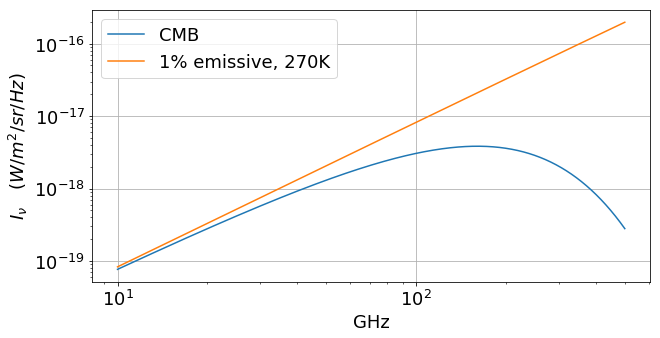

In [16]:

I300_01 = 0.01*jr.bbody.Bnu(nu,270.)  # 1% emissive room-temp optic
plt.loglog(nu_ghz,Bcmb,label='CMB')
plt.loglog(nu_ghz,I300_01,label='1% emissive, 270K')
plt.xlabel('GHz')
plt.ylabel(r'$I_{\nu} \ \ \ (W/m^2/sr/Hz)$')
plt.grid()
plt.legend()

As you can see, at low frequencies the power from a 1% emissive, 270K surface is the same as the CMB, because we're in the Rayleigh-Jeans region, where $B \propto T$, so $I \propto \epsilon T$, ie it's the emissivity-temperature product that matters.  At higher frequencies, the 1% emissive, 270 surface is brighter than the CMB.  (Note that 1% emissivity is not an unreasonable number for a mirror in a millimeter-wave telescope.)
<br>
<br>
Finally, let's look at the frequency dependence of galactic dust emission.  It turns out that off the galactic plane this is reasonably modeled as T=19K, $\epsilon(\nu) \propto \nu^{1.5}$ or so.  (I'm going to choose the overall normalization of the dust arbitrarily... the CMB is brighter in the mm-wave, I'm just not worrying about exactly how much brighter.)

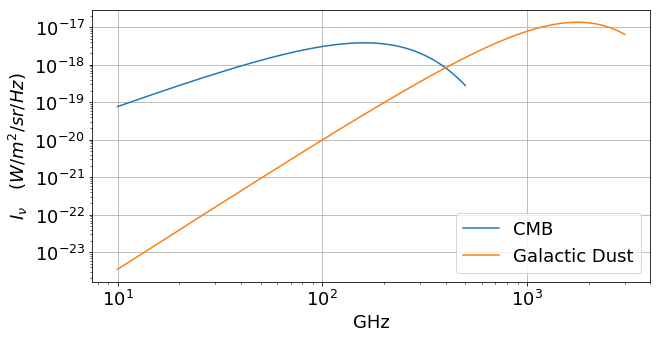

In [17]:
nu1_ghz = np.arange(10.,3000.,1.)
nu1 = nu1_ghz*1e9
Idust = 0.001*(nu1_ghz/300.)**1.5*jr.bbody.Bnu(nu1,19.)  
plt.loglog(nu_ghz,Bcmb,label='CMB')
plt.loglog(nu1_ghz,Idust,label='Galactic Dust')
plt.xlabel('GHz')
plt.ylabel(r'$I_{\nu} \ \ \ (W/m^2/sr/Hz)$')
plt.grid()
plt.legend()

From this we see that the dust is much dimmer relative to the CMB at low frequencies.  The exact normalization of this plot is not relevant;  we would be best served by considering amplitudes of $\Delta T$ fluctuations at a given spatial scale, which we'll leave for a later notebook.